# Name: Bhavesh Kewalramani
# Roll No.: A-25
# Section: A
# Semester: VII
# Shift: I
# Batch: A1

## 1. Open and display the image “dog.jpeg”. Convert the image into NumPy array,so that it can be used in further processing.[Hint:Use PIL module from python]

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
img = Image.open("dogs.jpeg")
np_array = np.array(img)

print("Array shape")
print(np_array.shape)

print("\nDimensions of the Image")
print("Height : " + str(img.height))
print("Width : " + str(img.width))

Array shape
(185, 272, 3)

Dimensions of the Image
Height : 185
Width : 272


## 2. Find out the dimensions of the image and convert it into a two-dimensional array.

In [3]:
flat_array = np_array.ravel()
new_array = flat_array.reshape(np_array.shape[0] * np_array.shape[1], np_array.shape[2])

## 3. Use k means clustering with k set to 3 and cluster the image. [Hint: Refer to k-means module of scikit learn]

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(new_array)

KMeans(n_clusters=3)

In [5]:
print("\nCluster centroids")
print(kmeans.cluster_centers_)


Cluster centroids
[[210.58152709 174.75377668 143.622578  ]
 [251.46736174 247.64450489 243.09952654]
 [ 29.50349995  21.57579569  20.47107076]]


In [6]:
print("Elements of Each cluster ")
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

Elements of Each cluster 
{0: 12210, 1: 19819, 2: 18291}


In [7]:
df = pd.DataFrame(new_array, columns=["col1", "col2", "col3"])
df["cluster"] = kmeans.labels_
print(df.head())

   col1  col2  col3  cluster
0   240   240   240        1
1   255   255   255        1
2   255   255   255        1
3   251   251   251        1
4   255   255   255        1


## 4. Predict the cluster label of every pixel in the image and plot it back as an image.

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


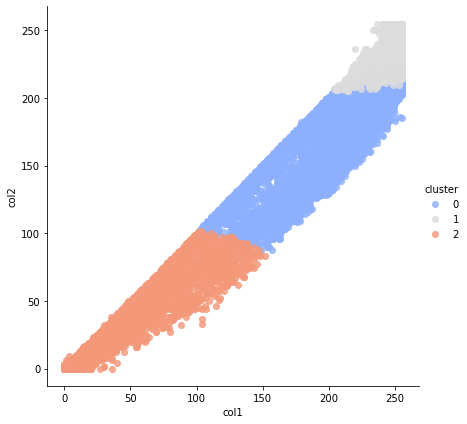

In [8]:
sns.lmplot('col1', 'col2', data=df, hue="cluster",palette='coolwarm', size=6, aspect=1, fit_reg=False)

In [9]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed = X_compressed.reshape(np_array.shape[0], np_array.shape[1], np_array.shape[2])

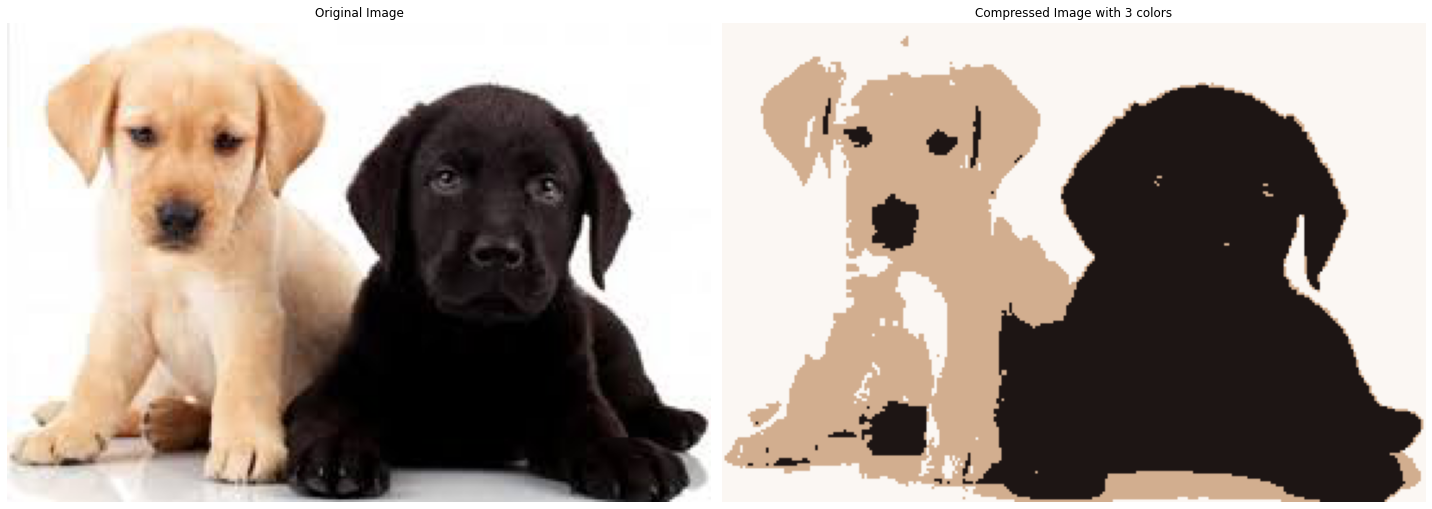

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

## 5. Find out the three dominant color in the image. [Hint: The cluster centers should correspond to three dominant colors]

In [11]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

In [12]:
centroid_colors = kmeans.cluster_centers_.astype(int)
colours = [rgb_to_hex(color) for color in centroid_colors]

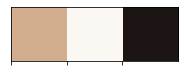

In [13]:
sns.palplot(colours)
plt.show()